####Görsellerin Gaussian Blur işlemine hazırlanması

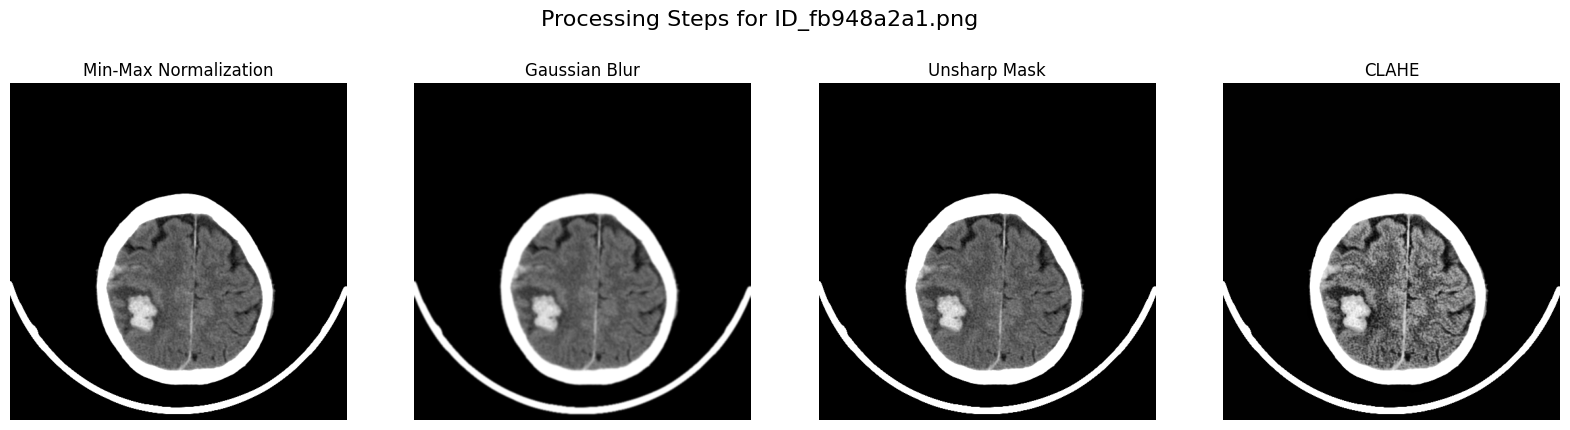

Final image saved to: /content/Test/ID_fb948a2a1.png


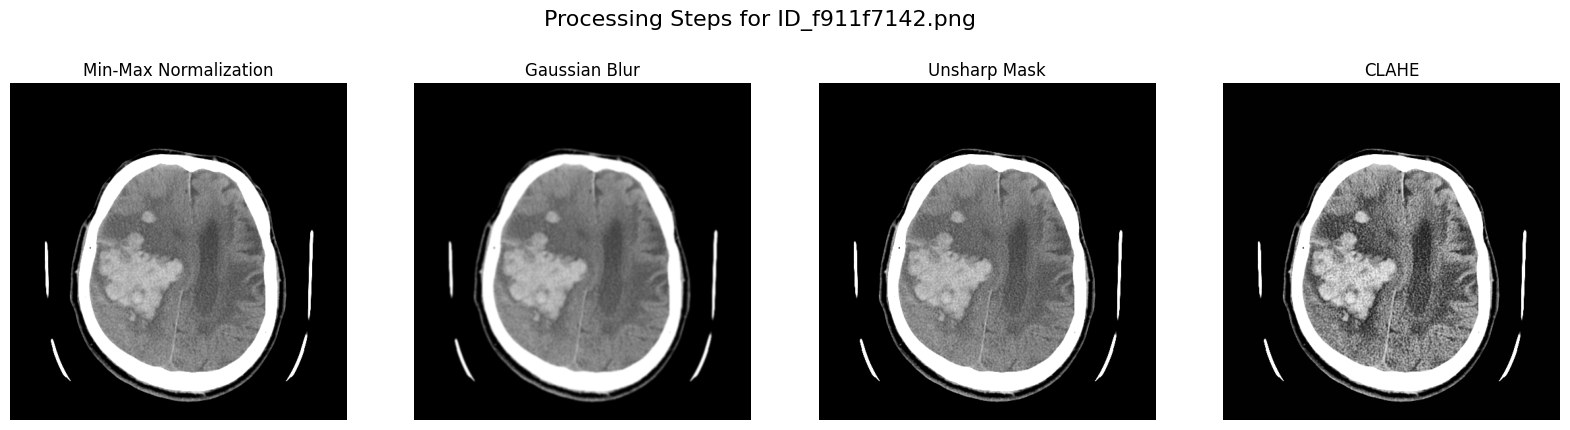

Final image saved to: /content/Test/ID_f911f7142.png


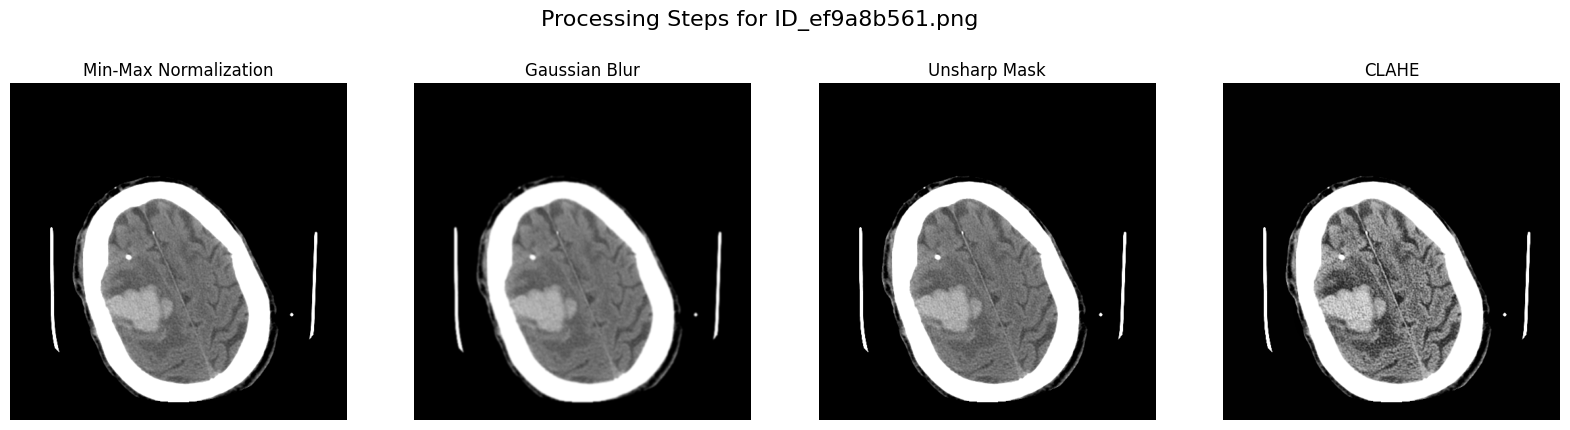

Final image saved to: /content/Test/ID_ef9a8b561.png


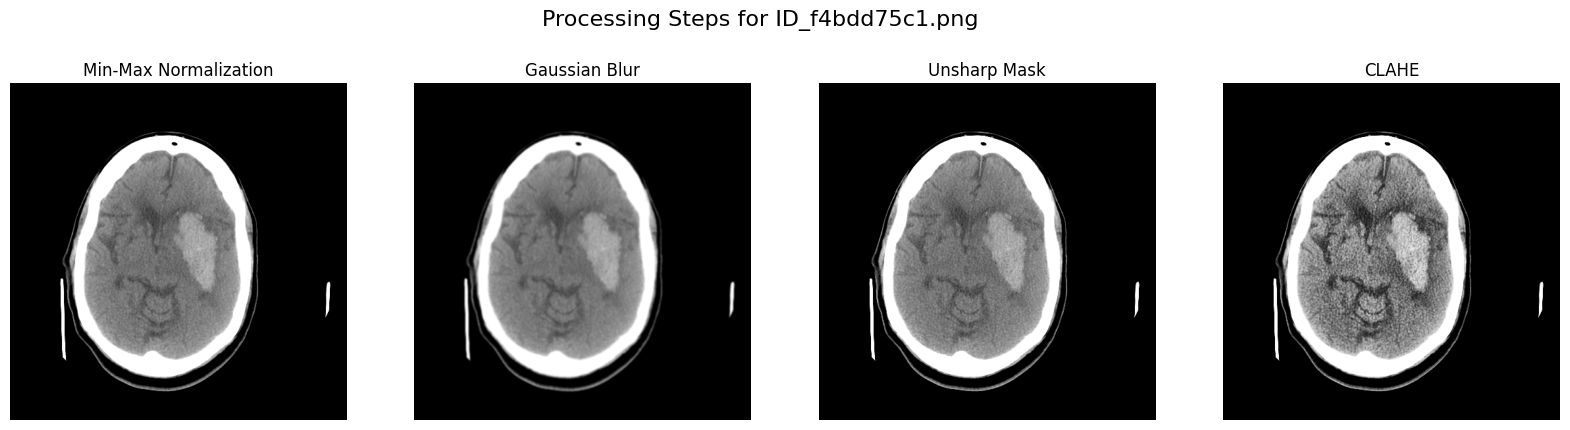

Final image saved to: /content/Test/ID_f4bdd75c1.png


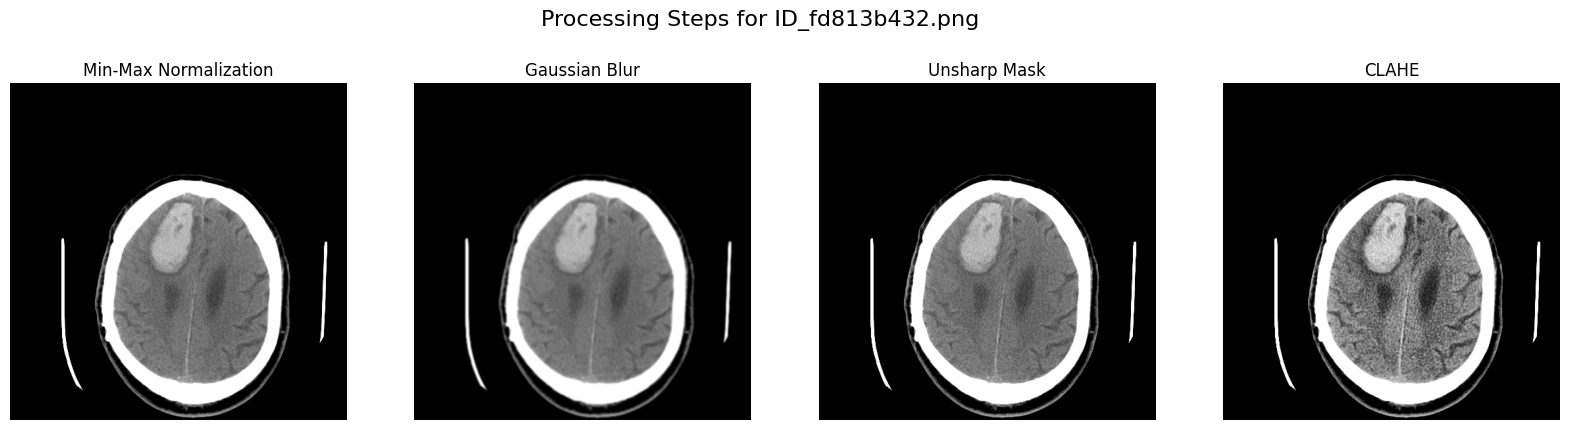

Final image saved to: /content/Test/ID_fd813b432.png


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pipeline_2(image):
    """
    Pipeline 2: Min-Max Normalization + Gaussian Blur + Unsharp Mask + CLAHE
    """
    # Min-Max Normalization
    normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

    # Gaussian Blur
    blurred = cv2.GaussianBlur(normalized, (5, 5), 1)

    # Unsharp Mask
    sharpened = cv2.addWeighted(normalized, 1.5, blurred, -0.5, 0)

    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(sharpened)

    return [
        ("Min-Max Normalization", normalized),
        ("Gaussian Blur", blurred),
        ("Unsharp Mask", sharpened),
        ("CLAHE", enhanced)
    ]

def display_pipeline_results(image_path, output_folder):
    """
    Process a single image using Pipeline 2 and save/display results.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Apply Pipeline 2
    results = pipeline_2(image)

    # Display Results
    plt.figure(figsize=(20, 5))
    for i, (title, img) in enumerate(results):
        plt.subplot(1, len(results), i + 1)
        plt.title(title)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Processing Steps for {os.path.basename(image_path)}", fontsize=16)
    plt.show()

    # Save the final result
    final_image = results[-1][1]
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(output_path, final_image)
    print(f"Final image saved to: {output_path}")

def process_folder(input_folder, output_folder):
    """
    Process all images in the input folder using Pipeline 2.
    """
    if not os.path.exists(input_folder):
        print(f"Input folder {input_folder} does not exist.")
        return

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tif'))]
    if not image_files:
        print(f"No images found in the folder: {input_folder}")
        return

    for image_file in image_files:
        image_path = os.path.join(input_folder, image_file)
        display_pipeline_results(image_path, output_folder)

if __name__ == "__main__":
    input_folder = "/content/test"  # Folder containing input images
    output_folder = "/content/Test"  # Folder to save processed images

    process_folder(input_folder, output_folder)


####Görsellere Gaussian Piramit Uygulaması

Bir görüntü üzerinde Gaussian Pyramid işlemi uygulayarak görüntünün farklı çözünürlük seviyelerini elde etmek, bu seviyeleri görselleştirmek ve belirli bir dizine kaydetmektir. Gaussian Pyramid, görüntünün düşük çözünürlüklü versiyonlarını oluşturmak için kullanılan bir tekniktir.


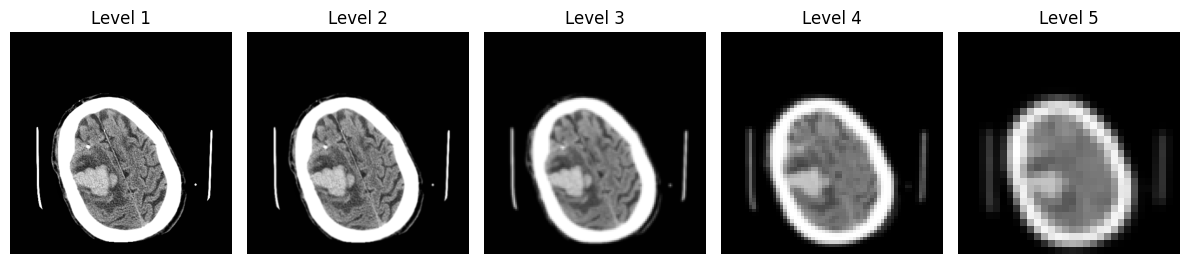

Level 1 saved to /content/gaussian_img1/gaussian_level_1.png
Level 2 saved to /content/gaussian_img1/gaussian_level_2.png
Level 3 saved to /content/gaussian_img1/gaussian_level_3.png
Level 4 saved to /content/gaussian_img1/gaussian_level_4.png
Level 5 saved to /content/gaussian_img1/gaussian_level_5.png
All pyramid levels have been saved to: /content/gaussian_img1


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_pyramid(image, levels=5):
    """
    Apply Gaussian Pyramid to the image.
    """
    pyramid = [image]  # List to store images at each level

    for i in range(levels - 1):
        # Apply Gaussian blur and downsample image
        image = cv2.pyrDown(image)
        pyramid.append(image)

    return pyramid

def save_gaussian_pyramid(pyramid, output_dir):
    """
    Save each level of the Gaussian pyramid to the specified output directory.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, img in enumerate(pyramid):
        output_file = os.path.join(output_dir, f"gaussian_level_{i + 1}.png")
        cv2.imwrite(output_file, img)
        print(f"Level {i+1} saved to {output_file}")

def display_gaussian_pyramid(pyramid):
    """
    Display images at each level of the Gaussian pyramid.
    """
    plt.figure(figsize=(12, 6))
    for i, img in enumerate(pyramid):
        plt.subplot(1, len(pyramid), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Level {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load an example image (change the path as needed)
image = cv2.imread("/content/Test/ID_ef9a8b561.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Pyramid
pyramid = apply_gaussian_pyramid(image, levels=5)

# Display the Gaussian Pyramid
display_gaussian_pyramid(pyramid)

# Save the Gaussian Pyramid levels to the specified directory
output_dir = "/content/gaussian_img1"
save_gaussian_pyramid(pyramid, output_dir)

print(f"All pyramid levels have been saved to: {output_dir}")


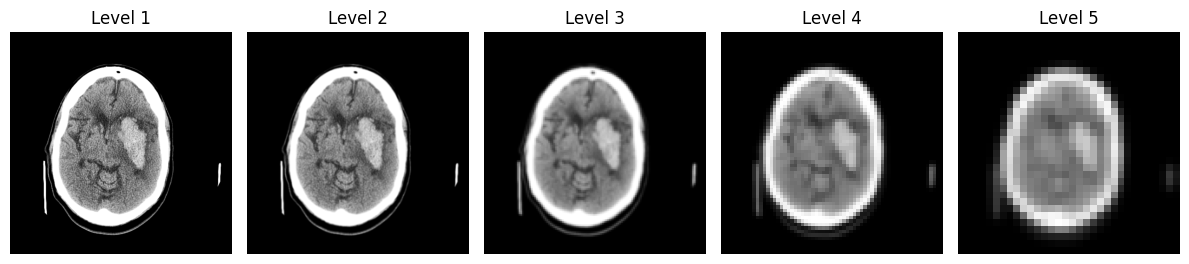

Level 1 saved to /content/gaussian_img2/gaussian_level_1.png
Level 2 saved to /content/gaussian_img2/gaussian_level_2.png
Level 3 saved to /content/gaussian_img2/gaussian_level_3.png
Level 4 saved to /content/gaussian_img2/gaussian_level_4.png
Level 5 saved to /content/gaussian_img2/gaussian_level_5.png
All pyramid levels have been saved to: /content/gaussian_img2


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_pyramid(image, levels=5):
    """
    Apply Gaussian Pyramid to the image.
    """
    pyramid = [image]  # List to store images at each level

    for i in range(levels - 1):
        # Apply Gaussian blur and downsample image
        image = cv2.pyrDown(image)
        pyramid.append(image)

    return pyramid

def save_gaussian_pyramid(pyramid, output_dir):
    """
    Save each level of the Gaussian pyramid to the specified output directory.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, img in enumerate(pyramid):
        output_file = os.path.join(output_dir, f"gaussian_level_{i + 1}.png")
        cv2.imwrite(output_file, img)
        print(f"Level {i+1} saved to {output_file}")

def display_gaussian_pyramid(pyramid):
    """
    Display images at each level of the Gaussian pyramid.
    """
    plt.figure(figsize=(12, 6))
    for i, img in enumerate(pyramid):
        plt.subplot(1, len(pyramid), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Level {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load an example image (change the path as needed)
image = cv2.imread("/content/Test/ID_f4bdd75c1.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Pyramid
pyramid = apply_gaussian_pyramid(image, levels=5)

# Display the Gaussian Pyramid
display_gaussian_pyramid(pyramid)

# Save the Gaussian Pyramid levels to the specified directory
output_dir = "/content/gaussian_img2"
save_gaussian_pyramid(pyramid, output_dir)

print(f"All pyramid levels have been saved to: {output_dir}")


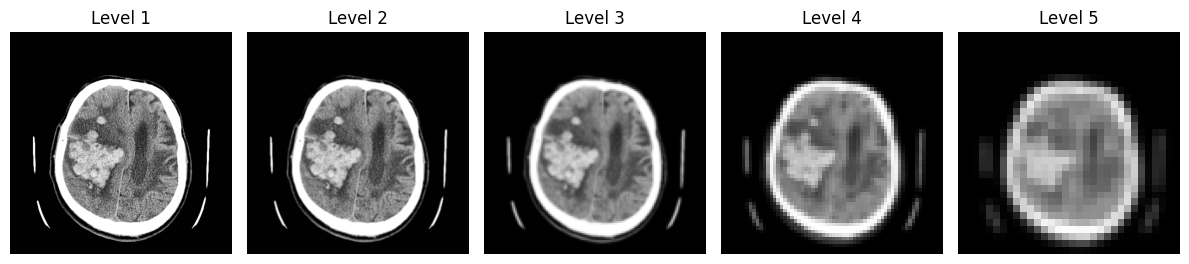

Level 1 saved to /content/gaussian_img3/gaussian_level_1.png
Level 2 saved to /content/gaussian_img3/gaussian_level_2.png
Level 3 saved to /content/gaussian_img3/gaussian_level_3.png
Level 4 saved to /content/gaussian_img3/gaussian_level_4.png
Level 5 saved to /content/gaussian_img3/gaussian_level_5.png
All pyramid levels have been saved to: /content/gaussian_img3


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_pyramid(image, levels=5):
    """
    Apply Gaussian Pyramid to the image.
    """
    pyramid = [image]  # List to store images at each level

    for i in range(levels - 1):
        # Apply Gaussian blur and downsample image
        image = cv2.pyrDown(image)
        pyramid.append(image)

    return pyramid

def save_gaussian_pyramid(pyramid, output_dir):
    """
    Save each level of the Gaussian pyramid to the specified output directory.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, img in enumerate(pyramid):
        output_file = os.path.join(output_dir, f"gaussian_level_{i + 1}.png")
        cv2.imwrite(output_file, img)
        print(f"Level {i+1} saved to {output_file}")

def display_gaussian_pyramid(pyramid):
    """
    Display images at each level of the Gaussian pyramid.
    """
    plt.figure(figsize=(12, 6))
    for i, img in enumerate(pyramid):
        plt.subplot(1, len(pyramid), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Level {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load an example image (change the path as needed)
image = cv2.imread("/content/Test/ID_f911f7142.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Pyramid
pyramid = apply_gaussian_pyramid(image, levels=5)

# Display the Gaussian Pyramid
display_gaussian_pyramid(pyramid)

# Save the Gaussian Pyramid levels to the specified directory
output_dir = "/content/gaussian_img3"
save_gaussian_pyramid(pyramid, output_dir)

print(f"All pyramid levels have been saved to: {output_dir}")


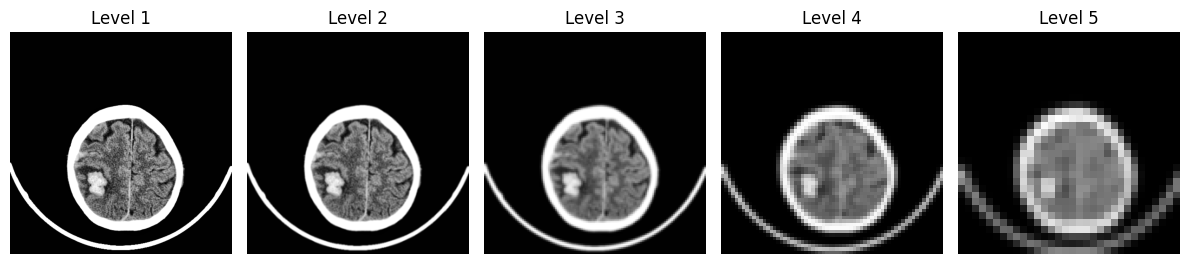

Level 1 saved to /content/gaussian_img4/gaussian_level_1.png
Level 2 saved to /content/gaussian_img4/gaussian_level_2.png
Level 3 saved to /content/gaussian_img4/gaussian_level_3.png
Level 4 saved to /content/gaussian_img4/gaussian_level_4.png
Level 5 saved to /content/gaussian_img4/gaussian_level_5.png
All pyramid levels have been saved to: /content/gaussian_img4


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_pyramid(image, levels=5):
    """
    Apply Gaussian Pyramid to the image.
    """
    pyramid = [image]  # List to store images at each level

    for i in range(levels - 1):
        # Apply Gaussian blur and downsample image
        image = cv2.pyrDown(image)
        pyramid.append(image)

    return pyramid

def save_gaussian_pyramid(pyramid, output_dir):
    """
    Save each level of the Gaussian pyramid to the specified output directory.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, img in enumerate(pyramid):
        output_file = os.path.join(output_dir, f"gaussian_level_{i + 1}.png")
        cv2.imwrite(output_file, img)
        print(f"Level {i+1} saved to {output_file}")

def display_gaussian_pyramid(pyramid):
    """
    Display images at each level of the Gaussian pyramid.
    """
    plt.figure(figsize=(12, 6))
    for i, img in enumerate(pyramid):
        plt.subplot(1, len(pyramid), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Level {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load an example image (change the path as needed)
image = cv2.imread("/content/Test/ID_fb948a2a1.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Pyramid
pyramid = apply_gaussian_pyramid(image, levels=5)

# Display the Gaussian Pyramid
display_gaussian_pyramid(pyramid)

# Save the Gaussian Pyramid levels to the specified directory
output_dir = "/content/gaussian_img4"
save_gaussian_pyramid(pyramid, output_dir)

print(f"All pyramid levels have been saved to: {output_dir}")


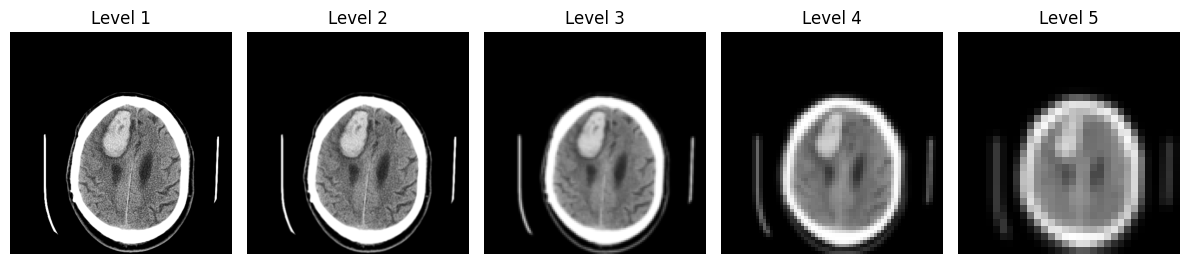

Level 1 saved to /content/gaussian_img5/gaussian_level_1.png
Level 2 saved to /content/gaussian_img5/gaussian_level_2.png
Level 3 saved to /content/gaussian_img5/gaussian_level_3.png
Level 4 saved to /content/gaussian_img5/gaussian_level_4.png
Level 5 saved to /content/gaussian_img5/gaussian_level_5.png
All pyramid levels have been saved to: /content/gaussian_img5


In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_pyramid(image, levels=5):
    """
    Apply Gaussian Pyramid to the image.
    """
    pyramid = [image]  # List to store images at each level

    for i in range(levels - 1):
        # Apply Gaussian blur and downsample image
        image = cv2.pyrDown(image)
        pyramid.append(image)

    return pyramid

def save_gaussian_pyramid(pyramid, output_dir):
    """
    Save each level of the Gaussian pyramid to the specified output directory.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, img in enumerate(pyramid):
        output_file = os.path.join(output_dir, f"gaussian_level_{i + 1}.png")
        cv2.imwrite(output_file, img)
        print(f"Level {i+1} saved to {output_file}")

def display_gaussian_pyramid(pyramid):
    """
    Display images at each level of the Gaussian pyramid.
    """
    plt.figure(figsize=(12, 6))
    for i, img in enumerate(pyramid):
        plt.subplot(1, len(pyramid), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Level {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load an example image (change the path as needed)
image = cv2.imread("/content/Test/ID_fd813b432.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Pyramid
pyramid = apply_gaussian_pyramid(image, levels=5)

# Display the Gaussian Pyramid
display_gaussian_pyramid(pyramid)

# Save the Gaussian Pyramid levels to the specified directory
output_dir = "/content/gaussian_img5"
save_gaussian_pyramid(pyramid, output_dir)

print(f"All pyramid levels have been saved to: {output_dir}")
